<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(1_6)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n250.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.958122,66.283872,60.120340,45.113412,1.455775,274.931521,268.975989,5.955533
1,0.0,1.0,53.931589,37.303755,31.593396,45.198152,-16.790779,161.236113,181.604168,-20.368055
2,0.0,2.0,54.495916,21.734716,42.724156,73.623341,-6.774720,195.803409,202.104081,-6.300673
3,0.0,3.0,96.338232,79.222869,78.393472,44.837954,18.472212,327.264739,299.034350,28.230389
4,0.0,4.0,60.241411,98.213202,71.948618,78.260359,-24.997332,293.666259,304.963919,-11.297660
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.589268,53.845395,55.635787,91.957625,22.448327,301.476402,292.790664,8.685738
29996,999.0,26.0,34.864807,86.522673,20.982495,29.226229,50.371715,231.967919,186.765896,45.202023
29997,999.0,27.0,67.847872,29.074579,55.460096,43.768002,5.008540,211.159090,200.266239,10.892850
29998,999.0,28.0,59.648714,61.090025,52.451125,74.069033,3.203573,260.462471,266.348575,-5.886105


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.958122,66.283872,60.120340,45.113412,1.455775,274.931521,268.975989,5.955533
1,0.0,1.0,53.931589,37.303755,31.593396,45.198152,-16.790779,161.236113,181.604168,-20.368055
2,0.0,2.0,54.495916,21.734716,42.724156,73.623341,-6.774720,195.803409,202.104081,-6.300673
3,0.0,3.0,96.338232,79.222869,78.393472,44.837954,18.472212,327.264739,299.034350,28.230389
4,0.0,4.0,60.241411,98.213202,71.948618,78.260359,-24.997332,293.666259,304.963919,-11.297660
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.589268,53.845395,55.635787,91.957625,22.448327,301.476402,292.790664,8.685738
29996,999.0,26.0,34.864807,86.522673,20.982495,29.226229,50.371715,231.967919,186.765896,45.202023
29997,999.0,27.0,67.847872,29.074579,55.460096,43.768002,5.008540,211.159090,200.266239,10.892850
29998,999.0,28.0,59.648714,61.090025,52.451125,74.069033,3.203573,260.462471,266.348575,-5.886105


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    91.958122  66.283872  60.120340  45.113412   1.455775   
      1.0    53.931589  37.303755  31.593396  45.198152 -16.790779   
      2.0    54.495916  21.734716  42.724156  73.623341  -6.774720   
      3.0    96.338232  79.222869  78.393472  44.837954  18.472212   
      4.0    60.241411  98.213202  71.948618  78.260359 -24.997332   
...                ...        ...        ...        ...        ...   
999.0 25.0   67.589268  53.845395  55.635787  91.957625  22.448327   
      26.0   34.864807  86.522673  20.982495  29.226229  50.371715   
      27.0   67.847872  29.074579  55.460096  43.768002   5.008540   
      28.0   59.648714  61.090025  52.451125  74.069033   3.203573   
      29.0   26.873334  46.895474  59.069410  21.221311 -23.801575   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    274.931521  268.975989   5.955533  
      1.0    161.236113  181.604168 -20.368055  
      2.0    195.803409  202.104081  -6.300673  
      3.0    327.264739  299.034350  28.230389  
      4.0    293.666259  304.963919 -11.297660  
...                 ...         ...        ...  
999.0 25.0   301.476402  292.790664   8.685738  
      26.0   231.967919  186.765896  45.202023  
      27.0   211.159090  200.266239  10.892850  
      28.0   260.462471  266.348575  -5.886105  
      29.0   140.257953  150.469810 -10.211857  

[30000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    91.958122  66.283872  60.120340  45.113412   1.455775   
      1.0    53.931589  37.303755  31.593396  45.198152 -16.790779   
      2.0    54.495916  21.734716  42.724156  73.623341  -6.774720   
      3.0    96.338232  79.222869  78.393472  44.837954  18.472212   
      4.0    60.241411  98.213202  71.948618  78.260359 -24.997332   
...                ...        ...        ...        ...        ...   
999.0 25.0   67.589268  53.845395  55.635787  91.957625  22.448327   
      26.0   34.864807  86.522673  20.982495  29.226229  50.371715   
      27.0   67.847872  29.074579  55.460096  43.768002   5.008540   
      28.0   59.648714  61.090025  52.451125  74.069033   3.203573   
      29.0   26.873334  46.895474  59.069410  21.221311 -23.801575   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    274.931521  268.975989   5.955533  
      1.0    161.236113  181.604168 -20.368055  
      2.0    195.803409  202.104081  -6.300673  
      3.0    327.264739  299.034350  28.230389  
      4.0    293.666259  304.963919 -11.297660  
...                 ...         ...        ...  
999.0 25.0   301.476402  292.790664   8.685738  
      26.0   231.967919  186.765896  45.202023  
      27.0   211.159090  200.266239  10.892850  
      28.0   260.462471  266.348575  -5.886105  
      29.0   140.257953  150.469810 -10.211857  

[30000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,91.958122,66.283872,60.120340,45.113412,1.455775,274.931521,268.975989,5.955533
1,0.0,1.0,53.931589,37.303755,31.593396,45.198152,-16.790779,161.236113,181.604168,-20.368055
2,0.0,2.0,54.495916,21.734716,42.724156,73.623341,-6.774720,195.803409,202.104081,-6.300673
3,0.0,3.0,96.338232,79.222869,78.393472,44.837954,18.472212,327.264739,299.034350,28.230389
4,0.0,4.0,60.241411,98.213202,71.948618,78.260359,-24.997332,293.666259,304.963919,-11.297660
...,...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,67.589268,53.845395,55.635787,91.957625,22.448327,301.476402,292.790664,8.685738
29996,999.0,26.0,34.864807,86.522673,20.982495,29.226229,50.371715,231.967919,186.765896,45.202023
29997,999.0,27.0,67.847872,29.074579,55.460096,43.768002,5.008540,211.159090,200.266239,10.892850
29998,999.0,28.0,59.648714,61.090025,52.451125,74.069033,3.203573,260.462471,266.348575,-5.886105


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4          e  \
rep   index                                                          
0.0   0.0    91.958122  66.283872  60.120340  45.113412   1.455775   
      1.0    53.931589  37.303755  31.593396  45.198152 -16.790779   
      2.0    54.495916  21.734716  42.724156  73.623341  -6.774720   
      3.0    96.338232  79.222869  78.393472  44.837954  18.472212   
      4.0    60.241411  98.213202  71.948618  78.260359 -24.997332   
...                ...        ...        ...        ...        ...   
999.0 25.0   67.589268  53.845395  55.635787  91.957625  22.448327   
      26.0   34.864807  86.522673  20.982495  29.226229  50.371715   
      27.0   67.847872  29.074579  55.460096  43.768002   5.008540   
      28.0   59.648714  61.090025  52.451125  74.069033   3.203573   
      29.0   26.873334  46.895474  59.069410  21.221311 -23.801575   

                      Y       y_hat      e_hat  
rep   index                                     
0.0   0.0    274.931521  268.975989   5.955533  
      1.0    161.236113  181.604168 -20.368055  
      2.0    195.803409  202.104081  -6.300673  
      3.0    327.264739  299.034350  28.230389  
      4.0    293.666259  304.963919 -11.297660  
...                 ...         ...        ...  
999.0 25.0   301.476402  292.790664   8.685738  
      26.0   231.967919  186.765896  45.202023  
      27.0   211.159090  200.266239  10.892850  
      28.0   260.462471  266.348575  -5.886105  
      29.0   140.257953  150.469810 -10.211857  

[30000 rows x 8 columns]

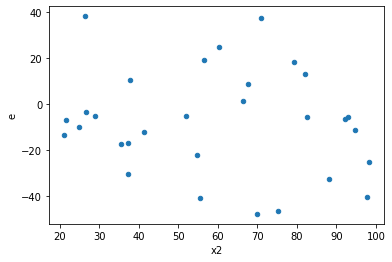

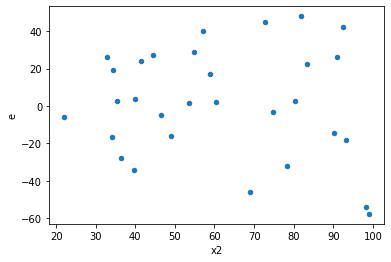

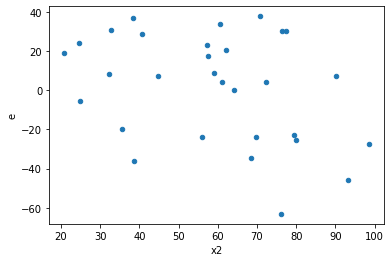

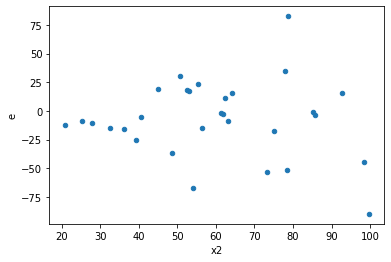

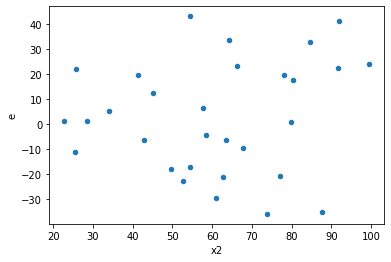

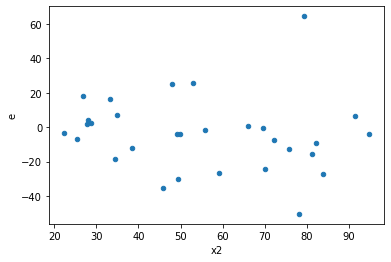

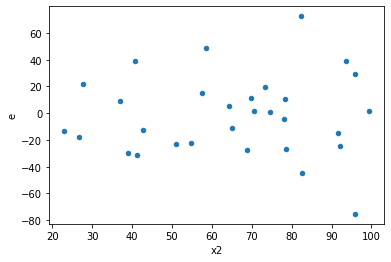

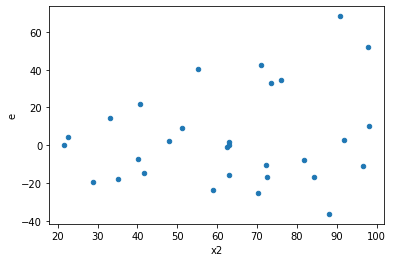

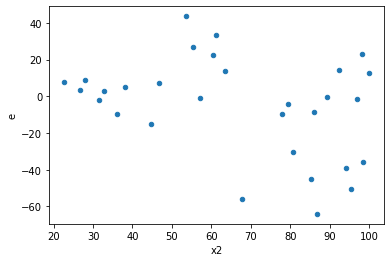

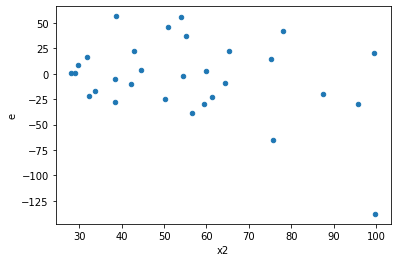

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,8.0,8.0,2910.912990646948,4614.5119949059845,363.8641238308685,576.8139993632481,1.585245594675234,0.5294028682294183,0.7352985658852909,0.26470143411470914,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,4075.773308414007,7627.970679883056,509.47166355175085,953.496334985382,1.8715394853133538,0.393926423732081,0.8030367881339595,0.1969632118660405,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,2867.002331009022,12739.288711547526,358.37529137612773,1592.4110889434407,4.443417633031369,0.04967499654640428,0.9751625017267979,0.02483749827320214,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,2818.366938878347,5313.3165888964295,352.29586735979336,664.1645736120537,1.8852465644558767,0.38852800276731836,0.8057359986163408,0.19426400138365918,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,6543.441414303072,13574.934621100643,817.930176787884,1696.8668276375804,2.0745864082205556,0.3222022101384141,0.838898894930793,0.16110110506920705,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,3043.9973794950356,7246.780620602119,380.49967243687945,905.8475775752648,2.380678994475441,0.24130833544203822,0.8793458322789809,0.12065416772101911,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,2019.5035064331564,6390.657285793874,252.43793830414455,798.8321607242342,3.164469517104747,0.12360621254725812,0.9381968937263709,0.06180310627362906,Reject001=1 : Homoscedasticity
9.0,8.0,8.0,2456.5018312681755,13648.23271207122,307.06272890852193,1706.0290890089025,5.555962767194553,0.02570717826896618,0.9871464108655169,0.01285358913448309,Reject001=1 : Homoscedasticity
10.0,8.0,8.0,1510.9275901814935,3835.3298887317483,188.8659487726867,479.41623609146853,2.5383942378542748,0.2092409814219418,0.8953795092890291,0.1046204907109709,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,8.0,8.0,2910.912990646948,4614.5119949059845,363.8641238308685,576.8139993632481,1.585245594675234,0.5294028682294183,Reject001=1 : Homoscedasticity
1.0,8.0,8.0,4075.773308414007,7627.970679883056,509.47166355175085,953.496334985382,1.8715394853133538,0.393926423732081,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,4689.022916729941,4253.993756030104,586.1278645912427,531.749219503763,0.9072239209691856,0.8938414528661577,Reject001=1 : Homoscedasticity
3.0,8.0,8.0,2867.002331009022,12739.288711547526,358.37529137612773,1592.4110889434407,4.443417633031369,0.04967499654640428,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,2195.8475548576935,1424.1134554168166,274.4809443572117,178.01418192710207,0.6485484168818401,0.5542736927825379,Reject001=1 : Homoscedasticity
5.0,8.0,8.0,2818.366938878347,5313.3165888964295,352.29586735979336,664.1645736120537,1.8852465644558767,0.38852800276731836,Reject001=1 : Homoscedasticity
6.0,8.0,8.0,6543.441414303072,13574.934621100643,817.930176787884,1696.8668276375804,2.0745864082205556,0.3222022101384141,Reject001=1 : Homoscedasticity
7.0,8.0,8.0,3043.9973794950356,7246.780620602119,380.49967243687945,905.8475775752648,2.380678994475441,0.24130833544203822,Reject001=1 : Homoscedasticity
8.0,8.0,8.0,2019.5035064331564,6390.657285793874,252.43793830414455,798.8321607242342,3.164469517104747,0.12360621254725812,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      803
Reject001=0 : Heteroscedasticity    197
Name: Result_test, dtype: int64